# Project: Wrangling and Analyze Data

## Table of Contents

1. [Data Gathering](#data_gathering)
2. [Assessing Data](#assessing_data)
3. [Quality Issues](#quality_issues)
4. [Tidiness Issues](#tidiness_issues)
5. [Cleaning Data](#cleaning_data)
6. [Quality](#quality)
7. [Tidiness](#tidiness)
8. [Storing Data](#storing_data)
9. [Analyzing and Visualizing Data](#analyzing_and_visualizing_data)
10. [Insights](#insights)
11. [Visualization](#visualization)

<a id='data_gathering'></a>
## Data Gathering

1. Direct download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Importing required libraries
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [3]:
# Gathering the required data
tweeter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Loading and inspecting data
tweeter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Downloading the required file using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
# Gathering the required data
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# Loading and inspecting data
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. The Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Accessing tweepy
consumer_key = 'XXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
tweet_ids = tweeter_archive.tweet_id.values
len(tweet_ids)

2356

In [192]:
# Writing json to a file
count = 0
fails_dict = {}
start = timer()
with open('tweets_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)     

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [10]:
# Reading the json file
attribute_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        attribute_list.append({'tweet_id': data['id_str'],
                                'retweets': data['retweet_count'],
                                'favorits': data['favorite_count']})
tweet_data = pd.DataFrame(attribute_list, columns = ['tweet_id', 'retweets', 'favorits'])

In [11]:
# Loading and inspecting data
tweet_data.head()

,tweet_id,retweets,favorits
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing_data'></a>
## Assessing Data

In [47]:
tweeter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_data

,tweet_id,retweets,favorits
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [15]:
# Performing check on columns that have missing values with info()
tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# Performing check on columns that have missing values with info()
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Performing check on columns that have missing values with info()
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null object
retweets    2354 non-null int64
favorits    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [18]:
# Getting descriptive statistics for each column of data
tweeter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# Getting descriptive statistics for each column of data
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Getting descriptive statistics for each column of data
tweet_data.describe()

,retweets,favorits
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [23]:
tweeter_archive[tweeter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


<a id='quality_issues'></a>
### Quality issues
1. Columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contains non-null values.

2. Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

3. Columns timestamp is an object not a datetime.

4. Multiple records with name as "a", "an", "the" in tweeter_archive table.

5. Columns rating_numerator and rating_denominator are integer instead of float.

6. Column tweet_id is an integer not an object in image_predictions table.

7. Column tweet_id is an integer not an object in tweeter_archive table.

8. Drop columns p1_dog, p2_dog and p3_dog.

<a id='tidiness_issues'></a>
### Tidiness issues
1. Columns doggo, floofer, pupper, puppo can be organized into single column as stages

2. Columns rate_numerator and rate_denominator can be organized into single column as rates

<a id='cleaning_data'></a>
## Cleaning Data

In [13]:
# Make copies of original pieces of data
tweeter_archive_clean = tweeter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

<a id='quality'></a>
### Quality

### Issue #1:
Columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp contains non-null values.

#### Define:
Remove all rows that have non-null values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Code

In [14]:
tweeter_archive_clean = tweeter_archive_clean[tweeter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [15]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:
Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Define
Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as they are of no use.

#### Code

In [16]:
tweeter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                            'retweeted_status_timestamp'], axis=1, inplace = True)

#### Test

In [17]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3:
Columns timestamp is an object not a datetime.

#### Define
Convert the timestamp column's data type from a object to a datetime using astype.

#### Code

In [18]:
tweeter_archive_clean.timestamp = pd.to_datetime(tweeter_archive_clean.timestamp)

#### Test

In [19]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### Issue #4:
Multiple records with name as "a", "an", "the" in tweeter_archive table.

#### Define
Replace the lowercase records with NaN using numpy library.

#### Code

In [20]:
lowercase_records = tweeter_archive_clean.name.str.islower() 
column_name = 'name' 
tweeter_archive_clean.loc[lowercase_records, column_name] = np.nan

#### Test

In [21]:
# Performing check on column
tweeter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

### Issue #5:
Columns rating_numerator and rating_denominator are integer instead of float.

#### Define
Convert the rating_numerator and rating_denominator column's data type from an integer to a float using astype.

#### Code

In [22]:
tweeter_archive_clean.rating_numerator = tweeter_archive_clean.rating_numerator.astype(float)
tweeter_archive_clean.rating_denominator = tweeter_archive_clean.rating_denominator.astype(float)

#### Test

In [23]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 220.9+ KB


### Issue #6:
Column tweet_id is an integer not an object in image_predictions table.

#### Define
Convert the  tweet_id column's data type from an integer to a string using astype.

#### Code

In [24]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [25]:
# Performing check on columns
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7:
Column tweet_id is an integer not an object in tweeter_archive table.

#### Define
Convert the tweet_id column's data type from a float to a string using astype.

#### Code

In [26]:
tweeter_archive_clean.tweet_id = tweeter_archive_clean.tweet_id.astype(str)

#### Test

In [27]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 220.9+ KB


### Issue #8:
Drop columns p1_dog, p2_dog and p3_dog

#### Dfine
Drop columns p1_dog, p2_dog and p3_dog from table image_predictions_clean as they are of no use.

#### Code

In [28]:
image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace = True)

#### Test

In [29]:
# Performing check on columns
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p2          2075 non-null object
p2_conf     2075 non-null float64
p3          2075 non-null object
p3_conf     2075 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 146.0+ KB


<a id='tidiness'></a>
### Tidiness

### Issue #1:
Columns doggo, floofer, pupper, puppo can be organized into single column as stages

#### Define
Melt the doggo, floofer, pupper, puppo columns to a stages. Change the data type as category using astype.

#### Code

In [30]:
tweeter_archive_clean = pd.melt(tweeter_archive_clean, id_vars =['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 
                                                                 'rating_numerator', 'rating_denominator', 'name'], 
                                var_name='stages', value_vars =['doggo', 'floofer', 'pupper', 'puppo'])

In [31]:
tweeter_archive_clean.stages = tweeter_archive_clean.stages.astype('category')

#### Test

In [32]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 10 columns):
tweet_id              8700 non-null object
timestamp             8700 non-null datetime64[ns]
source                8700 non-null object
text                  8700 non-null object
expanded_urls         8468 non-null object
rating_numerator      8700 non-null float64
rating_denominator    8700 non-null float64
name                  8284 non-null object
stages                8700 non-null category
value                 8700 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), object(6)
memory usage: 620.5+ KB


In [33]:
# Performing check on column
tweeter_archive_clean.stages.value_counts()

puppo      2175
pupper     2175
floofer    2175
doggo      2175
Name: stages, dtype: int64

In [34]:
# Checking for any duplicate values
tweeter_archive_clean[tweeter_archive_clean.duplicated(keep=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,value


### Issue #2:
Columns rate_numerator and rate_denominator can be organized into single column as rates.

#### Define
Melt the rate_numerator and rate_denominator columns to a rates. Change the data type as category using astype.

#### Code

In [35]:
tweeter_archive_clean = pd.melt(tweeter_archive_clean, id_vars =['tweet_id', 'timestamp', 'source', 'text', 
                                                                 'expanded_urls', 'name', 'stages'], 
                                var_name='ratings', value_vars =['rating_numerator', 'rating_denominator'])

#### Test

In [36]:
# Performing check on columns
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 9 columns):
tweet_id         17400 non-null object
timestamp        17400 non-null datetime64[ns]
source           17400 non-null object
text             17400 non-null object
expanded_urls    16936 non-null object
name             16568 non-null object
stages           17400 non-null category
ratings          17400 non-null object
value            17400 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 1.1+ MB


In [37]:
# Performing check on column
tweeter_archive_clean.ratings.value_counts()

rating_numerator      8700
rating_denominator    8700
Name: ratings, dtype: int64

In [38]:
# Merging all 3 datasets
all_dfs = [tweeter_archive_clean, image_predictions_clean, tweet_data_clean]

from functools import reduce
twitter_archive_clean_master = reduce(lambda  left,right:pd.merge(left,right,on=['tweet_id'], how='outer'), all_dfs)

In [39]:
# Performing check on columns
twitter_archive_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17581 entries, 0 to 17580
Data columns (total 19 columns):
tweet_id         17581 non-null object
timestamp        17400 non-null datetime64[ns]
source           17400 non-null object
text             17400 non-null object
expanded_urls    16936 non-null object
name             16568 non-null object
stages           17400 non-null category
ratings          17400 non-null object
value            17400 non-null float64
jpg_url          16033 non-null object
img_num          16033 non-null float64
p1               16033 non-null object
p1_conf          16033 non-null float64
p2               16033 non-null object
p2_conf          16033 non-null float64
p3               16033 non-null object
p3_conf          16033 non-null float64
retweets         17579 non-null float64
favorits         17579 non-null float64
dtypes: category(1), datetime64[ns](1), float64(7), object(10)
memory usage: 2.6+ MB


In [40]:
# Checking for any duplicate values
twitter_archive_clean_master[twitter_archive_clean_master.duplicated(keep=False)]

,tweet_id,timestamp,source,text,expanded_urls,name,stages,ratings,value,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweets,favorits


<a id='storing_data'></a>
## Storing Data

In [41]:
# Storing the data into single master dataset
twitter_archive_clean_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing_and_visualizing_data'></a>
## Analyzing and Visualizing Data

In [4]:
# Loading and inspecting data
df = pd.read_csv('twitter_archive_master.csv')

In [43]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stages,ratings,value,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweets,favorits
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,doggo,rating_numerator,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.07611,8853.0,39467.0
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,floofer,rating_numerator,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.07611,8853.0,39467.0
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,pupper,rating_numerator,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.07611,8853.0,39467.0
3,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,puppo,rating_numerator,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.07611,8853.0,39467.0
4,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,doggo,rating_denominator,10.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,bagel,0.085851,banana,0.07611,8853.0,39467.0


In [44]:
# Performing check on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17581 entries, 0 to 17580
Data columns (total 19 columns):
tweet_id         17581 non-null int64
timestamp        17400 non-null object
source           17400 non-null object
text             17400 non-null object
expanded_urls    16936 non-null object
name             16568 non-null object
stages           17400 non-null object
ratings          17400 non-null object
value            17400 non-null float64
jpg_url          16033 non-null object
img_num          16033 non-null float64
p1               16033 non-null object
p1_conf          16033 non-null float64
p2               16033 non-null object
p2_conf          16033 non-null float64
p3               16033 non-null object
p3_conf          16033 non-null float64
retweets         17579 non-null float64
favorits         17579 non-null float64
dtypes: float64(7), int64(1), object(11)
memory usage: 2.5+ MB


In [45]:
# Getting descriptive statistics for each column of data
df.describe()

,tweet_id,value,img_num,p1_conf,p2_conf,p3_conf,retweets,favorits
count,1.758100e+04,17400.000000,16033.000000,16033.000000,1.603300e+04,1.603300e+04,17579.000000,17579.000000
mean,7.378778e+17,11.854023,1.203206,0.594020,1.344413e-01,6.025827e-02,2812.462996,8656.965698
std,6.764640e+16,34.130478,0.560797,0.271794,1.006568e-01,5.088154e-02,4738.130534,12020.681051
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.769469e+17,10.000000,1.000000,0.362925,5.390140e-02,1.619070e-02,609.000000,1844.500000
50%,7.106100e+17,10.000000,1.000000,0.587764,1.175080e-01,4.948690e-02,1360.000000,3996.000000
75%,7.909874e+17,11.000000,1.000000,0.846628,1.952180e-01,9.160200e-02,3260.000000,10997.000000
max,8.924206e+17,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [46]:
# Sorting and grouping the required columns based on retweets and favorits
confidence_high = df.groupby(['p1', 'retweets', 'favorits'])[['p1_conf']].mean().sort_values(['retweets', 'favorits'], 
                                                                                             ascending=False)[0:5]
confidence_high

p1_conf
p1                 retweets favorits          
Labrador_retriever 79515.0  131075.0  0.825333
Chihuahua          56625.0  107015.0  0.505370
                            0.0       0.505370
Eskimo_dog         52360.0  75163.0   0.503372
Lakeland_terrier   48265.0  132810.0  0.196015

In [47]:
# Sorting and grouping the required columns based on retweets and favorits
confidence_low = df.groupby(['p1', 'retweets', 'favorits'])[['p1_conf']].mean().sort_values(['retweets', 'favorits'])[0:5]
confidence_low

p1_conf
p1                     retweets favorits          
English_setter         16.0     81.0      0.298617
pencil_box             23.0     0.0       0.662183
curly-coated_retriever 23.0     107.0     0.322084
web_site               34.0     0.0       0.998258
                                264.0     0.995535

In [48]:
# Sorting and grouping the required columns based on retweets and favorits
top_stages = df.groupby(['stages', 'p1', 'retweets', 'favorits'])[['p1_conf']].mean().sort_values(['retweets', 'favorits'], 
                                                                                                  ascending=False)[0:4]
top_stages

,,,,p1_conf
stages,p1,retweets,favorits,
doggo,Labrador_retriever,79515.0,131075.0,0.825333
floofer,Labrador_retriever,79515.0,131075.0,0.825333
pupper,Labrador_retriever,79515.0,131075.0,0.825333
puppo,Labrador_retriever,79515.0,131075.0,0.825333


In [49]:
# Finding out correlation between favorits and retweets
df['favorits'].corr(df['retweets'])

0.87871929837858531

<a id='insights'></a>
### Insights:
1. People really love the Labrador related posts inspite of their life stages and neural network algorithm also captured the same with good confidence level.

2. The English setter dogs are less retweeted, liked and neural network algorithm works perfect in this case as well.

3. The correlation coefficient between favorits and retweets is 0.88. Since this correlation is positive, it tells us that, as people like something on tweeter, they usually retweet.

<a id='visualization'></a>
### Visualization

In [5]:
# Finding out the relation between retweet and likes
median = df['retweets'].median()
tweet_low = df.query('retweets < {}'.format(median))
tweet_high = df.query('retweets > {}'.format(median))

favorite_low = tweet_low['favorits'].mean()
favorite_high = tweet_high['favorits'].mean()

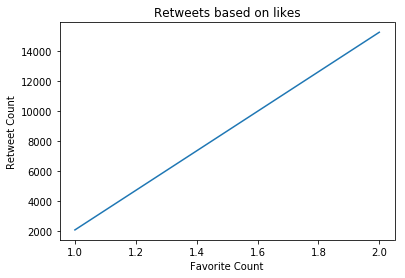

In [58]:
# Plotting graph to find out relation visually
locations = [1, 2]
heights = [favorite_low, favorite_high]
labels = ['Most liked', 'Less liked']

plt.title('Retweets based on likes')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.plot(locations, heights);

##### The graph shows that if people likes something on tweeter, they ususally reweet.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'retweets' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


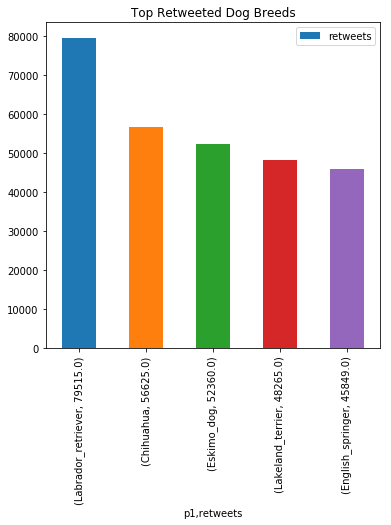

In [76]:
# Finding out the top 5 rewteeted and liked dog breeds.
df.groupby(['p1', 'retweets'])[['retweets']].mean().sort_values(['retweets'], 
            ascending=False)[0:5].plot(kind='bar', figsize=(6,6), y='retweets', title='Top Retweeted Dog Breeds', );

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'favorits' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


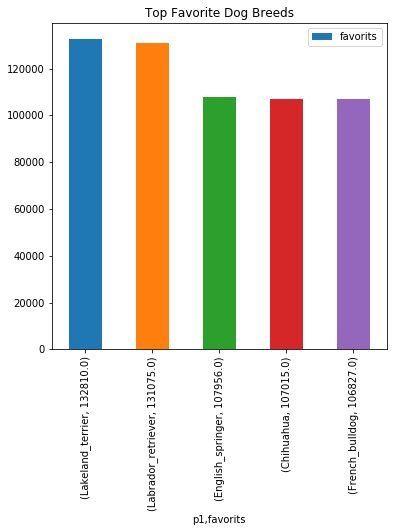

In [75]:
# Finding out the top 5 rewteeted and liked dog breeds.
df.groupby(['p1', 'favorits'])[['favorits']].mean().sort_values(['favorits'], 
            ascending=False)[0:5].plot(kind='bar', figsize=(6,6), y='favorits', title='Top Favorite Dog Breeds', );